# Geodatenanalyse 1

## Tag 3 / Block 2 / Übung 7: Monte Carlo Methoden

Die Aufgabenstellung für diese Übung ist die Quantifizierung der Unsicherheit bei der analytischen Berechnung der biologischen Abbaurate von O-Xylol in einem kontaminierten Aquifer. Verwendet dafür folgende in Würth et al. (2021) angegebene Formel 6: 

<a href="https://www.codecogs.com/eqnedit.php?latex=\lambda&space;=&space;\frac{\Delta&space;\delta&space;^{13}C&space;\cdot&space;k_{f}&space;\cdot&space;i}{\epsilon&space;\cdot&space;s&space;\cdot&space;n_{e}}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\lambda&space;=&space;\frac{\Delta&space;\delta&space;^{13}C&space;\cdot&space;k_{f}&space;\cdot&space;i}{\epsilon&space;\cdot&space;s&space;\cdot&space;n_{e}}" title="\lambda = \frac{\Delta \delta ^{13}C \cdot k_{f} \cdot i}{\epsilon \cdot s \cdot n_{e}}" /></a>

mit 

<a href="https://www.codecogs.com/eqnedit.php?latex=k_{f}&space;=&space;\frac{s&space;\cdot&space;n_{e}}{t&space;\cdot&space;i}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?k_{f}&space;=&space;\frac{s&space;\cdot&space;n_{e}}{t&space;\cdot&space;i}" title="k_{f} = \frac{s \cdot n_{e}}{t \cdot i}" /></a>


Angaben zu den Parametern und den angenommenen Verteilungen der unbekannten Werte findet Ihr in Tabelle 3 der Studie (Literaturordner auf ILIAS). Übernehmt dabei die Werte für das Brunnenpaar G10m - G30u. Dabei steht *N* für Normal-, *U* für Uniform- und *W* für Weibull-Verteilung. Ersetzt dabei die Weibull-Verteilung für den hydraulischen Gradienten durch *U*(0.0013, 0.0016). Beachtet auch, dass einige Verteilungen begrenzt ("truncated") sind (s. Übung 1-2-3). 

Neben der Generierung von Zufallszahlen und der analytischen Berechnung der Abbaurate, sollte Euer Code auch eine Visualisierung der Ergebnisse beinhalten.   





0.00019445127839334128 0.2193420404070198


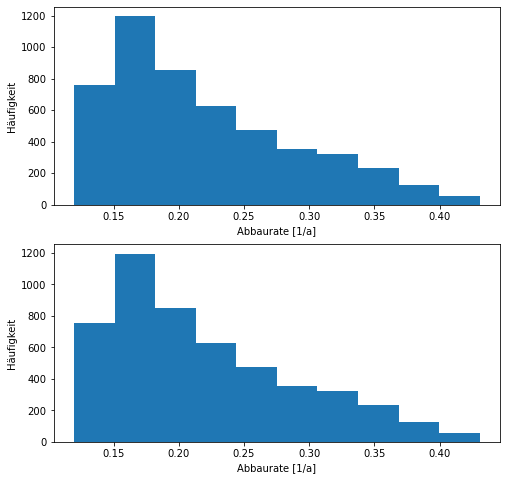

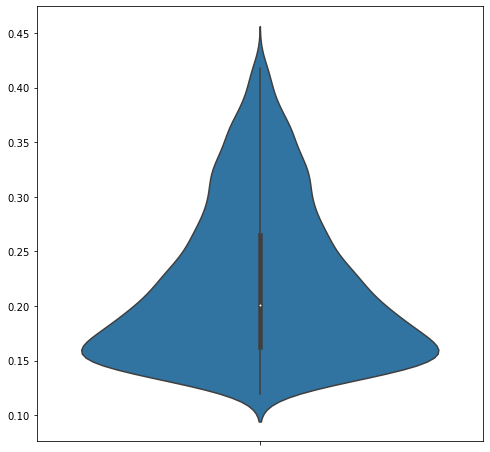

In [13]:
# Monte-Carlo Simulation zur Bestimmung der Abbaurate von O-Xylol
# benötigte Packages importieren

import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import seaborn as sns

# Anzahl der MC Simulationen festlegen
n = 5000 # number of MC simulations 

# Input Parameter erzeugen
# isotope shift delta 13C [o/oo], truncated to (3.8, 4.8)
a, b = (3.8 - 4.3) / 0.7, (4.8 - 4.3) / 0.7
deltaC = truncnorm.rvs(a, b, 4.3, 0.7, size=n)

# isotope enrichment factor epsilon [-]
epsilon = np.random.uniform(-3.2, -1.1, n)

# distance [m]
s = np.random.uniform(415, 423, n)

# effective porosity [-], trunctaed to (0.12, 0.30)
a, b = (0.12 - 0.21) / 0.09, (0.3 - 0.21) / 0.09
neff = truncnorm.rvs(a, b, 0.21, 0.09, size=n)

# time, truncated to (3e8, 3.3e8)
a, b = (3e8 - 3.15e8) / 1.6e6, (3.3e8 - 3.15e8) / 1.6e6
t = truncnorm.rvs(a, b, 3.15e8, 1.6e6, size=n)

# hydraulic gradient [-]
grad = np.random.uniform(1.3e-3, 1.6e-3, n)

# analytische Modellierung 
kf = (s*neff)/(t*grad)
lambda_rate = -(deltaC*kf*grad)/(epsilon*s*neff)

lambda_rate = lambda_rate*3600*24*365 # to get values as [1/a]

# Mittelwerte für berechnete kf-Wert und Abbaurate ausgeben lassen
print(kf.mean(), lambda_rate.mean())

# Verteilungen der Werte der Abbaurate visualisieren
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(2,1,1)
plt.hist(lambda_rate)
plt.ylabel("Häufigkeit")
plt.xlabel("Abbaurate [1/a]")

ax1 = fig.add_subplot(2,1,2)
plt.hist(lambda_rate)
plt.ylabel("Häufigkeit")
plt.xlabel("Abbaurate [1/a]")

plt.show()


Vergleicht Eure Ergebnisse mit denen in Abbildung 3 in dem Paper von Würth et al. (2021). Stimmen die Ergebnisse überein? 

Wenn Ihr noch Zeit habt, könnt Ihr verschiedene Möglichkeiten und Funktionen zum Visualieren von Unsicherheit mit `matplotlib` und `seaborn` ausprobieren (vgl. Folie 7 der Vorlesung).

In [ ]:
# weitere Abbildungen

## Ende

### Referenzen: 

Würth et al. (2021): Quantifying biodegradation rate constants of o-xylene by combining compound-specific isotope analysis and groundwater dating. Journal of Contaminant Hydrology, 238, 103757